In [167]:
#!pip install hf_xet
#!pip install pymilvus
#!pip install ragas

In [168]:
# Load all required Libraries
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt

In [169]:
dataset = load_dataset("rag-datasets/rag-mini-wikipedia", "text-corpus")
qa_dataset = load_dataset("rag-datasets/rag-mini-wikipedia", "question-answer")

df = pd.DataFrame(dataset)
qa_df = pd.DataFrame(qa_dataset)

# output_path = Path("/Users/connie/Desktop/Fall 2025/LLM/Assignment2/data/processed/rag_mini_wiki.csv")
# output_path.parent.mkdir(parents=True, exist_ok=True)
# df.to_csv(output_path, index=False)

# output_path = Path("/Users/connie/Desktop/Fall 2025/LLM/Assignment2/data/processed/rag_mini_wiki_qa.csv")
# output_path.parent.mkdir(parents=True, exist_ok=True)
# qa_df.to_csv(output_path, index=False)

In [170]:
df.columns

Index(['passages'], dtype='object')

In [171]:
df.head()

,passages
0,{'passage': 'Uruguay (official full name in ;...
1,{'passage': 'It is bordered by Brazil to the n...
2,{'passage': 'Montevideo was founded by the Spa...
3,{'passage': 'The economy is largely based in a...
4,{'passage': 'According to Transparency Interna...


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   passages  3200 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


In [173]:
type(df.iloc[0]["passages"])

dict

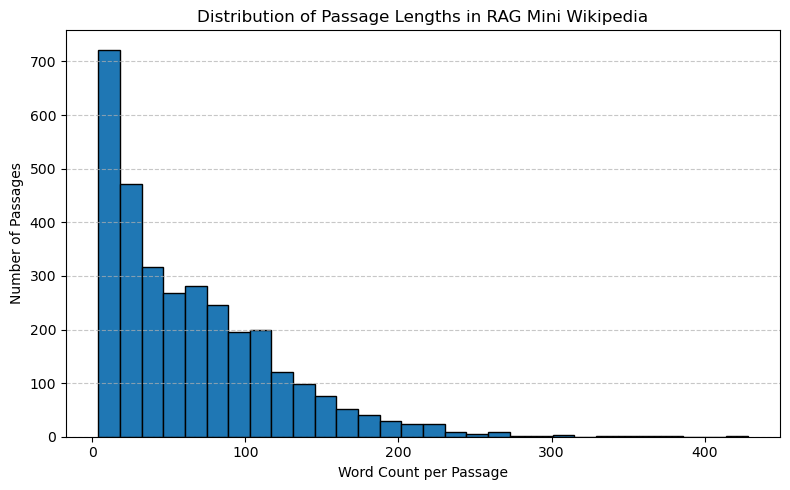

Total passages: 3200
Average length: 65.18 words
Shortest passage: 4 words (Index: 112)
Longest passage: 428 words (Index: 2095)


In [174]:
# passages word count
df["text_length"] = df["passages"].apply(lambda x: len(str(x).split()))
num_entries = len(df)
avg_length = df["text_length"].mean()
max_length = df["text_length"].max()
min_length = df["text_length"].min()

# .idxmax() returns the index of the row with the largest value
# .idxmin() returns the index of the row with the smallest value
index_of_max = df["text_length"].idxmax()
index_of_min = df["text_length"].idxmin()

plt.figure(figsize=(8, 5))
plt.hist(df["text_length"], bins=30, edgecolor='black')
plt.title("Distribution of Passage Lengths in RAG Mini Wikipedia")
plt.xlabel("Word Count per Passage")
plt.ylabel("Number of Passages")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Total passages: {num_entries}")
print(f"Average length: {avg_length:.2f} words")
print(f"Shortest passage: {min_length} words (Index: {index_of_min})")
print(f"Longest passage: {max_length} words (Index: {index_of_max})")

In [175]:
# Print the content of the shortest and longest passages for exploration
print("\n--- Shortest Passage Content (Sample) ---")
print(f"ID {index_of_min}: {df.loc[index_of_min, 'passages']}")

print("\n--- Longest Passage Content (Sample) ---")
print(f"ID {index_of_max}: {df.loc[index_of_max, 'passages']}")


--- Shortest Passage Content (Sample) ---
ID 112: {'passage': '125px', 'id': 112}

--- Longest Passage Content (Sample) ---
ID 2095: {'passage': "As Ford approached his ninetieth year, he began to experience significant health problems associated with old age. He suffered two minor strokes at the 2000 Republican National Convention, but made a quick recovery.  Gerald Ford recovering after strokes. BBC, August 2, 2000.  Retrieved on December 31, 2006.  In January 2006, he spent 11 days at the Eisenhower Medical Center near his residence at Rancho Mirage, California, for treatment of pneumonia.  Former President Ford, 92, hospitalized with pneumonia. Associated Press, January 17, 2006. Retrieved on October 19, 2007.  On April 23, President George W. Bush visited Ford at his home in Rancho Mirage for a little over an hour. This was Ford's last public appearance and produced the last known public photos, video footage and voice recording. While vacationing in Vail, Colorado, he was hospit

In [176]:
df["char_len"] = df["passages"].apply(lambda x: len(str(x)))
print(f"Shortest passage length (characters): {df['char_len'].min()}")
print(f"Longest passage length (characters): {df['char_len'].max()}")

Shortest passage length (characters): 27
Longest passage length (characters): 2542
